In [1]:
# %%capture
!pip install diffusers --upgrade
!pip install invisible_watermark transformers accelerate safetensors
# !pip install matplotlib

     ---------------------------------------- 1.7/1.7 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 277.4/277.4 kB 5.7 MB/s eta 0:00:00
     -------------------------------------- 311.7/311.7 kB 6.6 MB/s eta 0:00:00
     ------------------------------------- 166.4/166.4 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2022.11.0
    Uninstalling fsspec-2022.11.0:
      Successfully uninstalled fsspec-2022.11.0
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.10.1
    Uninstalling huggingface-hub-0.10.1:
      Successfully uninstalled huggingface-hub-0.10.1
     ---------------------------------------- 1.6/1.6 MB 6.1 MB/s eta 0:00:00
     -------------------------------------- 261.4/261.4 kB 8.1 MB/s eta 0:00:00


In [2]:
!python --version

Python 3.10.9


In [6]:
!pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to c:\users\lenovo\appdata\local\temp\pip-req-build-vbdzqxge
  Resolved https://github.com/huggingface/transformers to commit 35551f9a0f66a22de4971b4a51b3c172d3b87f95
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 2.2/2.2 MB 8.2 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.36.0.dev0-py3-none-any.whl size=8049451 sha256=6b3429459d22ddbc2e8af585a8ab1ba63e344308b0007d609066042cdea10ad0
  Stored in directory: C:\Users\LENOVO\AppData\Local\Temp\pip-ephem-wheel-cache-4az4_9f7\wheels\c0\14\d6\6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting 

  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers 'C:\Users\LENOVO\AppData\Local\Temp\pip-req-build-vbdzqxge'
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\LENOVO\\anaconda3\\Lib\\site-packages\\~okenizers\\tokenizers.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In my case I have to install lower versin transformers.

In [2]:
!pip install transformers -U

     ---------------------------------------- 7.9/7.9 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.24.0
    Uninstalling transformers-4.24.0:
      Successfully uninstalled transformers-4.24.0


In [4]:
# !pip install -U accelerate

# Text-to-image generation with DeciDiffusion and HuggingFace 🧨diffusers


**Note:** All generation times shown below are from a single high-RAM, RTX 3050 GPU 4GB

In [1]:
import torch
import os
import time
from IPython.core.display import display, HTML

from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from diffusers import StableDiffusionPipeline

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2812\4013913749.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# 1️⃣ Step 1: Load custom pipeline from DeciDiffusion repo

In [4]:
# It took plenty of time to load everything in my case
deci_diffusion_pipeline = StableDiffusionPipeline.from_pretrained('Deci/DeciDiffusion-v1-0',
                                                   custom_pipeline='Deci/DeciDiffusion-v1-0',
                                                   torch_dtype=torch.float16
                                                   )

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

# 2️⃣ Step 2:  Load custom unet from DeciDiffusion repo, set it to `pipeline` object's UNet

In [5]:
deci_diffusion_pipeline.unet = deci_diffusion_pipeline.unet.from_pretrained('Deci/DeciDiffusion-v1-0',
                                              subfolder='flexible_unet',
                                              torch_dtype=torch.float16)

# Move pipeline to device
deci_diffusion_pipeline = deci_diffusion_pipeline.to('cuda')

flexible_unet/config.json:   0%|          | 0.00/2.65k [00:00<?, ?B/s]

The config attributes {'act_fn': 'silu', 'addition_embed_type': None, 'addition_embed_type_num_heads': 64, 'addition_time_embed_dim': None, 'attention_head_dim': 8, 'attention_type': 'default', 'block_out_channels': [320, 640, 1280, 1280], 'center_input_sample': False, 'class_embed_type': None, 'class_embeddings_concat': False, 'configurations': {'add_downsample': [True, True, True], 'add_upsample': [True, True, False], 'add_upsample_mid_block': True, 'cross_attention_dim': 768, 'down_blocks_in_channels': [320, 320, 640], 'down_blocks_num_attentions': [0, 1, 3], 'down_blocks_num_resnets': [2, 2, 1], 'down_blocks_out_channels': [320, 640, 1280], 'mid_num_attentions': 2, 'mid_num_resnets': 4, 'mix_block_in_forward': True, 'num_attention_heads': 8, 'prev_output_channels': [1280, 1280, 640], 'resnet_act_fn': 'silu', 'resnet_eps': 1e-05, 'sample_size': 64, 'temb_dim': 1280, 'up_blocks_num_attentions': [6, 3, 0], 'up_blocks_num_resnets': [2, 3, 3]}, 'conv_in_kernel': 3, 'conv_out_kernel': 3,

# 3️⃣ Step 3: Generate Image

In [6]:
def text_to_image(pipeline, prompt):

    # Start the timer
    start_time = time.time()

    # Call the pipeline function directly
    result = pipeline([prompt], generator=torch.Generator("cuda").manual_seed(42))

    # Calculate and print the elapsed time
    elapsed_time = time.time() - start_time
    display(HTML(f'<span style="color: #3264ff; font-weight:bold;font-size: 20px;">Time taken to generate: {elapsed_time:.2f} seconds</span>'))

    img = result.images[0]

    filename = prompt.replace(' ', '_')
    if len(filename) > 100:  # Limit filename to 100 characters
        filename = filename[:100]

    # Incorporate the pipeline's class name into the filename
    pipeline_name = pipeline.__class__.__name__
    #save_path = os.path.join("/content", f"{pipeline_name}_{filename}.png")
    save_path = os.path.join("D:/deciDiffusion", f"{pipeline_name}_{filename}.png")
#     img.save(save_path)

    # Display the saved image
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return save_path

  0%|          | 0/30 [00:00<?, ?it/s]

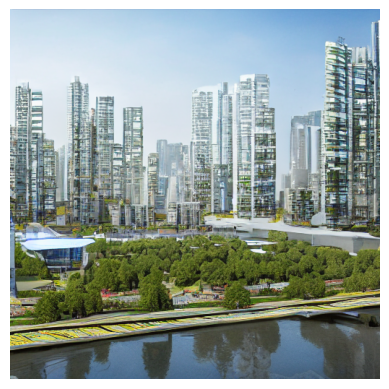

'D:/deciDiffusion\\DeciDiffusionPipeline_Creat_realistic_view_of_New_tech_city_with_indian_design,_very_detailed_real_photo..png'

In [16]:
text_to_image(deci_diffusion_pipeline, "Creat realistic view of New tech city with indian design, very detailed real photo.")

  0%|          | 0/30 [00:00<?, ?it/s]

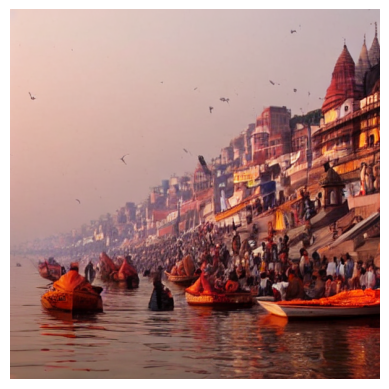

'D:/deciDiffusion\\DeciDiffusionPipeline_Illustrate_a_serene_view_of_the_Ganges_River_at_Varanasi,_with_ghats,_pilgrims,_and_the_evening_Gang.png'

In [12]:
text_to_image(deci_diffusion_pipeline, "Illustrate a serene view of the Ganges River at Varanasi, with ghats, pilgrims, and the evening Ganga Aarti.")

# Cat and Lion sitting together and enjoying ice cream

  0%|          | 0/30 [00:00<?, ?it/s]

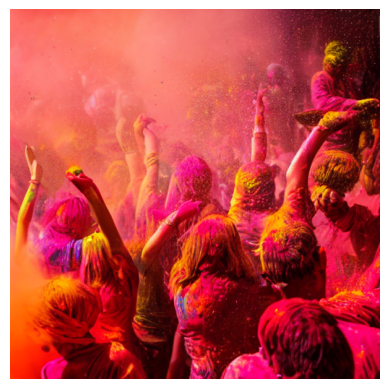

'D:/deciDiffusion\\DeciDiffusionPipeline_Create_a_colorful_image_capturing_the_spirit_of_the_Holi_festival,_with_people_throwing_vibrant_powd.png'

In [38]:
text_to_image(deci_diffusion_pipeline, "Create a colorful image capturing the spirit of the Holi festival, with people throwing vibrant powdered colors.")


  0%|          | 0/30 [00:00<?, ?it/s]

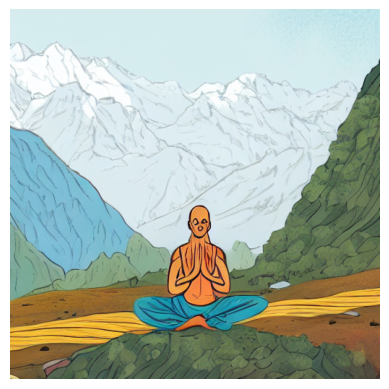

'D:/deciDiffusion\\DeciDiffusionPipeline_Illustrate_a_meditative_scene_of_a_yogi_practicing_yoga_amidst_the_serene_beauty_of_the_Himalayan_mo.png'

In [39]:
text_to_image(deci_diffusion_pipeline, "Illustrate a meditative scene of a yogi practicing yoga amidst the serene beauty of the Himalayan mountains.")

  0%|          | 0/30 [00:00<?, ?it/s]

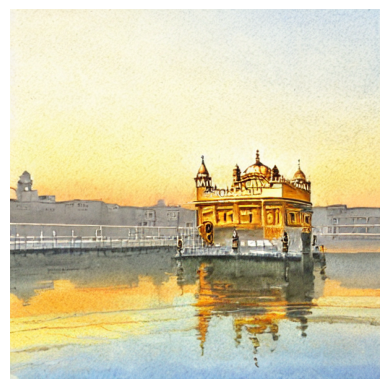

'D:/deciDiffusion\\DeciDiffusionPipeline_a_water_color_painting_of_the_Golden_Temple_awash_in_the_glow_of_morning_light_with_a_vanilla_sky.png'

In [26]:
text_to_image(deci_diffusion_pipeline, "a water color painting of the Golden Temple awash in the glow of morning light with a vanilla sky")

  0%|          | 0/30 [00:00<?, ?it/s]

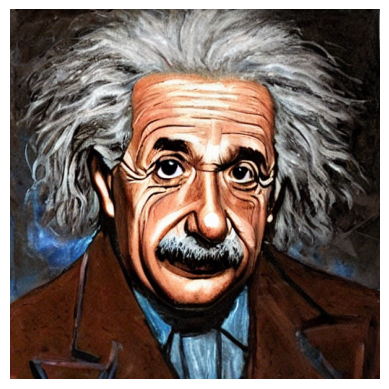

'/content/DeciDiffusionPipeline_a_realistic_portrait_of_albert_einstein_with_a_bewildered_expression.png'

In [ ]:
text_to_image(deci_diffusion_pipeline, "a realistic portrait of albert einstein with a bewildered expression")

  0%|          | 0/30 [00:00<?, ?it/s]

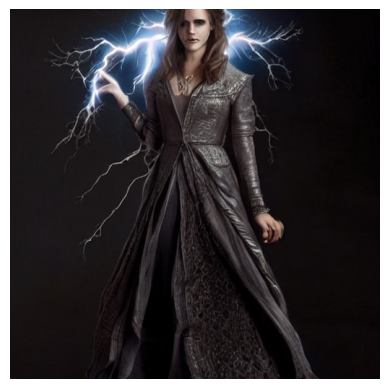

'/content/DeciDiffusionPipeline_Emma_Watson_as_a_powerful_mysterious_sorceress,_casting_lightning_magic,_detailed_clothing.png'

In [ ]:
text_to_image(deci_diffusion_pipeline, "Emma Watson as a powerful mysterious sorceress, casting lightning magic, detailed clothing")

  0%|          | 0/30 [00:00<?, ?it/s]

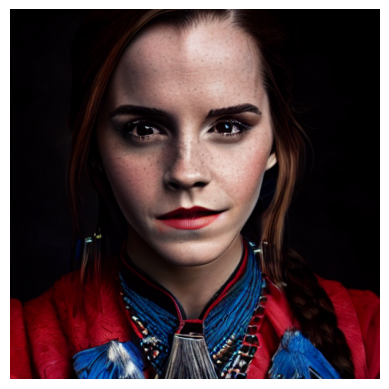

'D:/deciDiffusion\\DeciDiffusionPipeline_Emma_Watson_portrait_photo_of_a_asia_old_warrior_chief,_tribal_panther_make_up,_blue_on_red,_side_pr.png'

In [17]:
prompt = "Emma Watson portrait photo of a asia old warrior chief, tribal panther make up, blue on red, side profile, looking away, serious eyes, 50mm portrait photography, hard rim lighting photography–beta –ar 2:3 –beta –upbeta –beta –upbeta –beta –upbeta"

text_to_image(deci_diffusion_pipeline, prompt)

  0%|          | 0/30 [00:00<?, ?it/s]

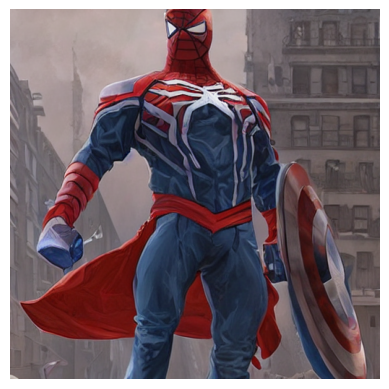

'D:/deciDiffusion\\DeciDiffusionPipeline_clear_portrait_of_a_superhero_concept_between_spiderman_and_captain_america_with_sheild_and_,_cottag.png'

In [22]:
prompt = "clear portrait of a superhero concept between spiderman and captain america with sheild and , cottagecore!!, background hyper detailed, character concept, full body, intricate, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration, art by artgerm and greg rutkowski and alphonse mucha"
text_to_image(deci_diffusion_pipeline, prompt)

  0%|          | 0/30 [00:00<?, ?it/s]

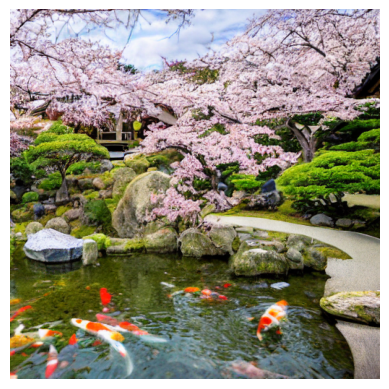

'D:/deciDiffusion\\DeciDiffusionPipeline_Generate_an_image_of_a_serene_Japanese_garden_with_a_koi_pond_and_cherry_blossoms..png'

In [31]:
prompt = "Generate an image of a serene Japanese garden with a koi pond and cherry blossoms."
text_to_image(deci_diffusion_pipeline, prompt)

  0%|          | 0/30 [00:00<?, ?it/s]

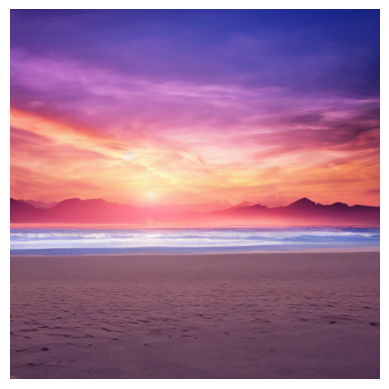

'D:/deciDiffusion\\DeciDiffusionPipeline_Visualize_a_peaceful_beach_at_sunset_with_gentle_waves_and_a_colorful_sky_between_mountains..png'

In [23]:

prompt = "Visualize a peaceful beach at sunset with gentle waves and a colorful sky between mountains."
text_to_image(deci_diffusion_pipeline, prompt)